1)Findthenumberofdistinctbookings,sessions,andsearchesfromthegivendatasets

In [ ]:
import pandas as pd

# Load the datasets
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

# Number of distinct bookings
num_distinct_bookings = bookings['booking_id'].nunique()

# Number of distinct sessions
num_distinct_sessions = sessions['session_id'].nunique()

# Number of distinct searches
num_distinct_searches = sessions['search_id'].nunique()

# Print the results
print(f"Number of distinct bookings: {num_distinct_bookings}")
print(f"Number of distinct sessions: {num_distinct_sessions}")
print(f"Number of distinct searches: {num_distinct_searches}")


Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


2)Howmanysessions havemorethanonebooking?

In [ ]:
import pandas as pd

# Load the dataset
sessions = pd.read_csv('Sessions.csv')

# Group by session_id and count the number of unique bookings per session
bookings_per_session = sessions.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = bookings_per_session[bookings_per_session > 1]

# Number of sessions with more than one booking
num_sessions_with_multiple_bookings = sessions_with_multiple_bookings.shape[0]

# Print the result
print(f"Number of sessions with more than one booking: {num_sessions_with_multiple_bookings}")


Number of sessions with more than one booking: 10


3)Whichdaysoftheweekhavethehighestnumberofbookings?Also,drawa piecharttoshowthedistribution forall daysoftheweek?

Number of bookings per day of the week:
day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


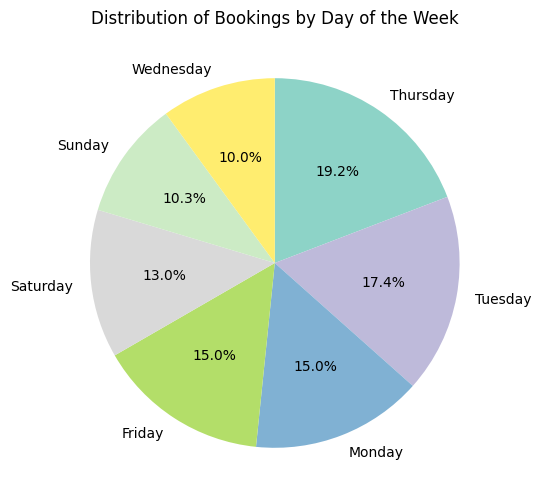

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
bookings = pd.read_csv('Bookings.csv')

# Convert booking_time to datetime and extract the day of the week
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

# Count the number of bookings for each day of the week
bookings_per_day = bookings['day_of_week'].value_counts()

# Print the result
print("Number of bookings per day of the week:")
print(bookings_per_day)

# Plot a pie chart
plt.figure(figsize=(10, 6))
bookings_per_day.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, cmap='Set3')
plt.title('Distribution of Bookings by Day of the Week')
plt.ylabel('')
plt.show()


4)Foreachoftheservicenames,displaythetotalnumberofbookingsandthetotalGrossBookingValueinINR

In [ ]:
import pandas as pd

# Load the dataset
bookings = pd.read_csv('Bookings.csv')

# Group by service_name and aggregate data
service_stats = bookings.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gbv_inr=('INR_Amount', 'sum')
).reset_index()

# Print the result
print(service_stats)


  service_name  total_bookings  total_gbv_inr
0      GOIBIBO             186     5897637.97
1          MMT              48      665669.08
2        YATRA             105     3378702.13


5)Forcustomerswhohavemorethan1booking,whichisthemostbookedroute(from_cityto to_city)?

In [ ]:
import pandas as pd

# Load the dataset
bookings = pd.read_csv('Bookings.csv')

# Identify customers with more than one booking
customer_booking_counts = bookings['customer_id'].value_counts()
customers_with_multiple_bookings = customer_booking_counts[customer_booking_counts > 1].index

# Filter bookings to include only those customers
filtered_bookings = bookings[bookings['customer_id'].isin(customers_with_multiple_bookings)]

# Group by route (from_city to to_city) and count the occurrences
route_counts = filtered_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='count')

# Find the most booked route
most_booked_route = route_counts.loc[route_counts['count'].idxmax()]

# Print the result
print(f"The most booked route for customers with more than one booking is from {most_booked_route['from_city']} to {most_booked_route['to_city']} with {most_booked_route['count']} bookings.")


The most booked route for customers with more than one booking is from Gurgaon to Roissy-en-France with 5 bookings.


6)Whicharethetop3departurecitiesfromwherecustomersbookmostlyinadvance,providedthattherehavebeen atleast5 departuresfromthatcity

In [ ]:
import pandas as pd

# Load the dataset
bookings = pd.read_csv('Bookings.csv')

# Filter cities with at least 5 departures
city_departure_counts = bookings['from_city'].value_counts()
cities_with_min_departures = city_departure_counts[city_departure_counts >= 5].index

# Filter bookings to include only these cities
filtered_bookings = bookings[bookings['from_city'].isin(cities_with_min_departures)]

# Calculate the average days to departure for each city
average_advance_booking_days = filtered_bookings.groupby('from_city')['days_to_departure'].mean().reset_index()

# Sort the cities by average days to departure in descending order
sorted_cities = average_advance_booking_days.sort_values(by='days_to_departure', ascending=False)

# Get the top 3 cities
top_3_cities = sorted_cities.head(3)

# Print the result
print("Top 3 departure cities where customers book mostly in advance:")
print(top_3_cities)


Top 3 departure cities where customers book mostly in advance:
    from_city  days_to_departure
1     Bālāpur          46.166667
4  Devanhalli          29.583333
2     Chennai          26.187500


7)Plot a heatmap displaying correlations of the numerical column and report whichpairofnumericalcolumnsinthebookingsdataset,havethemaximumcorrelation?

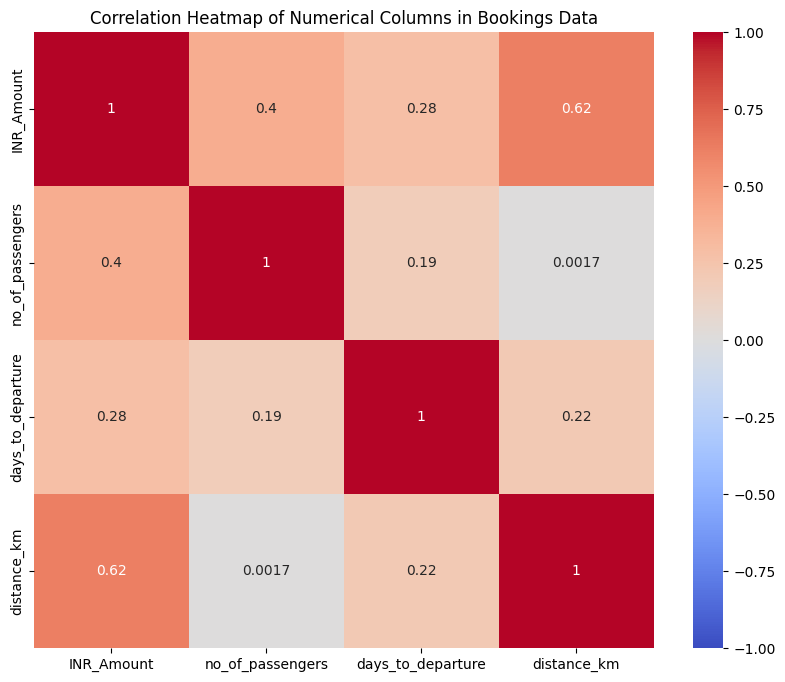

The pair of numerical columns with the maximum correlation is: INR_Amount and distance_km with a correlation of 0.62.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
bookings = pd.read_csv('Bookings.csv')

# Select numerical columns
numerical_columns = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']
numerical_data = bookings[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns in Bookings Data')
plt.show()

# Identify the pair of columns with the maximum correlation
max_corr = correlation_matrix.unstack().sort_values(ascending=False)
# Exclude self-correlation (diagonal elements) by removing the first occurrence (1.0)
max_corr = max_corr[max_corr != 1.0].reset_index()
max_corr_pair = max_corr.iloc[0]

# Print the result
print(f"The pair of numerical columns with the maximum correlation is: {max_corr_pair['level_0']} and {max_corr_pair['level_1']} with a correlation of {max_corr_pair[0]:.2f}.")


8)Foreachservice,whichisthemostuseddevicetypeformakingbookingsontheplatform?

In [ ]:
import pandas as pd

# Load the dataset
bookings = pd.read_csv('Bookings.csv')

# Group by service_name and device_type_used, then count the number of bookings
device_usage = bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')

# Identify the most used device type for each service
most_used_device = device_usage.loc[device_usage.groupby('service_name')['count'].idxmax()]

# Print the result
print("Most used device type for each service:")
print(most_used_device)


Most used device type for each service:
  service_name device_type_used  count
2      GOIBIBO              IOS     70
5          MMT          Desktop     30
9        YATRA          Desktop     51


9)Plotthetrendsata quarterlyfrequencyforthenumberofbookingsbyeachofthedevice types, that is, plot a time series for each year and quarter showing thenumberofbookingsperformed by eachdevicetype

<ipython-input-15-00505c3cf405>:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_time'].dt.to_period('Q').dt.start_time  # Convert to datetime at the start of the quarter


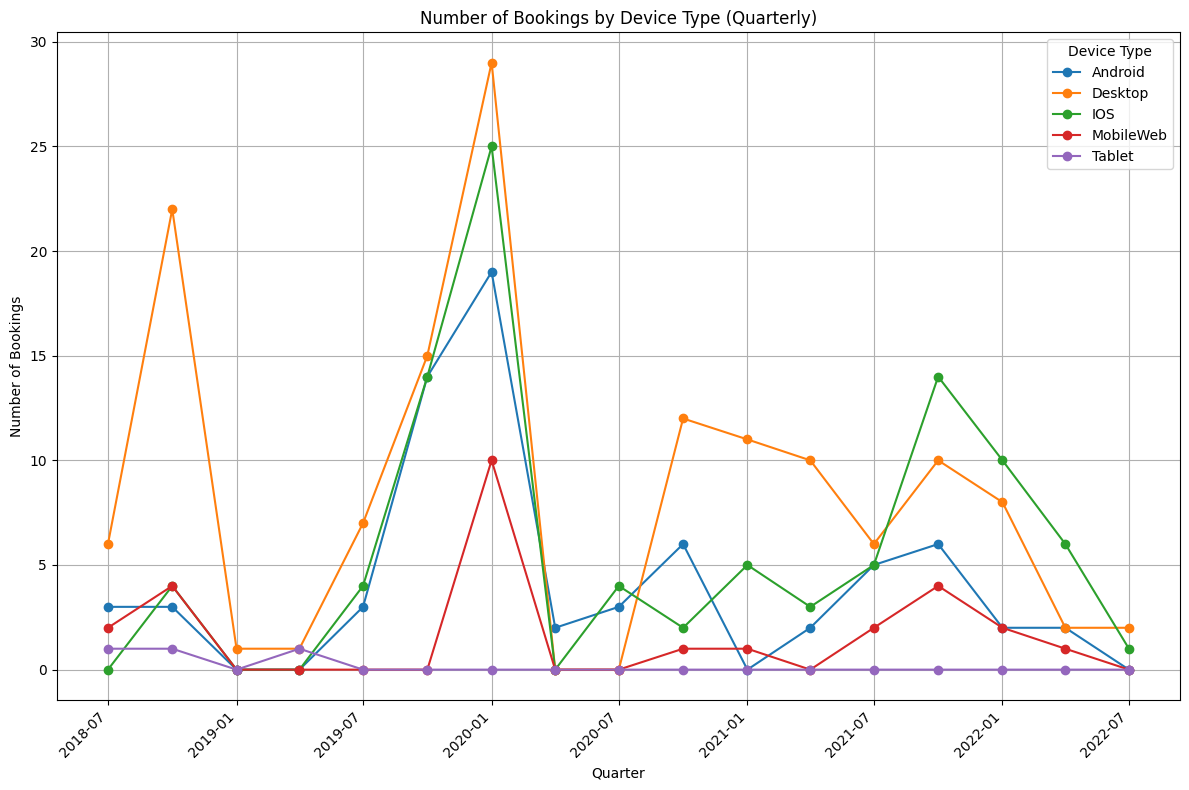

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
bookings = pd.read_csv('Bookings.csv')

# Convert booking_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extract year and quarter from booking_time
bookings['year'] = bookings['booking_time'].dt.year
bookings['quarter'] = bookings['booking_time'].dt.to_period('Q').dt.start_time  # Convert to datetime at the start of the quarter

# Group by year, quarter, and device_type_used, and count the number of bookings
quarterly_bookings = bookings.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='booking_count')

# Pivot the data for plotting
pivot_data = quarterly_bookings.pivot_table(index='quarter', columns='device_type_used', values='booking_count', fill_value=0)

# Plot the time series
plt.figure(figsize=(12, 8))
for device_type in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[device_type], marker='o', label=device_type)

plt.title('Number of Bookings by Device Type (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


10)Considerthefollowingexample:12customersperformedatotalof100searchesbutonlyafewofthemperformed10bookingsintotal.Searches= 100bookings =10customers= 12Theoverallbooking tosearchratio,Ober,is10/100=0.1Usingtheaboveinformation/context,answerthe following:•WhatistheaverageoBSRforeachmonth oftheyear?•WhatistheaverageoBSRforeachdayoftheweek?•Plotatimeseries ofoBSRonall thegivendates.

<ipython-input-17-32e66ea48bbc>:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['year_month'] = bookings['booking_time'].dt.to_period('M').astype(str)
<ipython-input-17-32e66ea48bbc>:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sessions['year_month'] = sessions['search_time'].dt.to_period('M').astype(str)


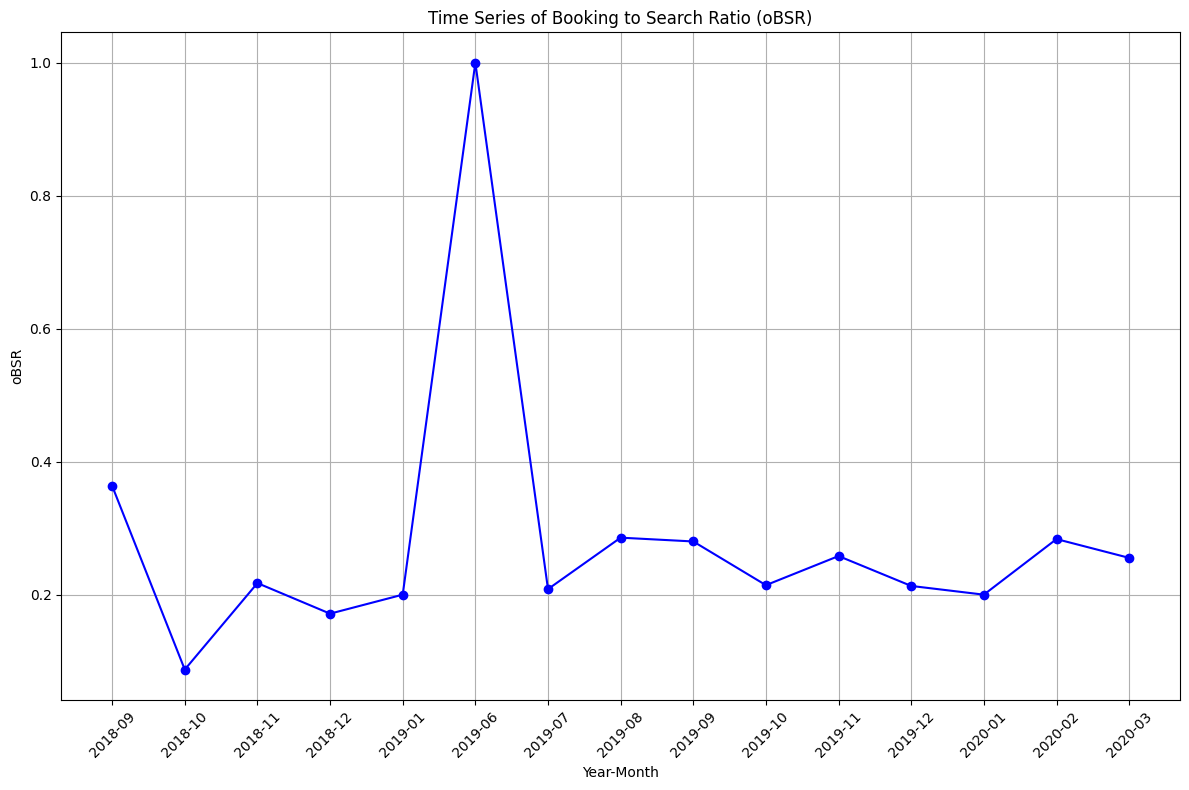

Average oBSR for each month of the year:
year_month
2018-09    0.363636
2018-10    0.087379
2018-11    0.217391
2018-12    0.171429
2019-01    0.200000
2019-06    1.000000
2019-07    0.208333
2019-08    0.285714
2019-09    0.280000
2019-10    0.214286
2019-11    0.258065
2019-12    0.213115
2020-01    0.200000
2020-02    0.283582
2020-03    0.255319
2020-05         inf
2020-06         inf
2020-07         inf
2020-08         inf
2020-09         inf
2020-10         inf
2020-11         inf
2020-12         inf
2021-01         inf
2021-02         inf
2021-03         inf
2021-04         inf
2021-05         inf
2021-06         inf
2021-07         inf
2021-08         inf
2021-09         inf
2021-10         inf
2021-11         inf
2021-12         inf
2022-01         inf
2022-02         inf
2022-03         inf
2022-04         inf
2022-05         inf
2022-06         inf
2022-07         inf
Name: oBSR, dtype: float64

Average oBSR for each day of the week:
day_of_week
Friday       0.372263
Monday 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

# Convert booking_time and search_time to datetime, with error handling
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'], errors='coerce')
sessions['search_time'] = pd.to_datetime(sessions['search_time'], errors='coerce')

# Check for and drop rows with invalid dates
bookings = bookings.dropna(subset=['booking_time'])
sessions = sessions.dropna(subset=['search_time'])

# Extract year, month, and day of the week
bookings['year_month'] = bookings['booking_time'].dt.to_period('M').astype(str)
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

sessions['year_month'] = sessions['search_time'].dt.to_period('M').astype(str)
sessions['day_of_week'] = sessions['search_time'].dt.day_name()

# Calculate the number of bookings and searches per date
booking_counts = bookings.groupby('year_month').size()
search_counts = sessions.groupby('year_month').size()

# Merge the data to calculate oBSR
data = pd.DataFrame({
    'bookings': booking_counts,
    'searches': search_counts
}).fillna(0)
data['oBSR'] = data['bookings'] / data['searches']

# Average oBSR for each month
average_oBSR_month = data.groupby(data.index).mean()['oBSR']

# Calculate the oBSR for each day of the week
booking_counts_day = bookings.groupby('day_of_week').size()
search_counts_day = sessions.groupby('day_of_week').size()

# Merge the data for day of the week
data_day = pd.DataFrame({
    'bookings': booking_counts_day,
    'searches': search_counts_day
}).fillna(0)
data_day['oBSR'] = data_day['bookings'] / data_day['searches']

# Average oBSR for each day of the week
average_oBSR_day = data_day.groupby(data_day.index).mean()['oBSR']

# Plot the time series of oBSR
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['oBSR'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Booking to Search Ratio (oBSR)')
plt.xlabel('Year-Month')
plt.ylabel('oBSR')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results
print("Average oBSR for each month of the year:")
print(average_oBSR_month)

print("\nAverage oBSR for each day of the week:")
print(average_oBSR_day)


This project involves analyzing booking and session data to gain insights into user behavior and preferences within a travel or service-based platform. The analysis begins with determining the number of distinct bookings, sessions, and searches to assess user engagement and the platform's reach. It then identifies sessions where users made multiple bookings, shedding light on repeat booking behavior within a single session. By examining booking patterns by the day of the week, the project uncovers trends and peak times, informing targeted marketing and resource allocation strategies. Additionally, the analysis explores the distribution of bookings across different services and the most commonly used devices, enabling the platform to optimize for user preferences. The project also identifies popular travel routes and analyzes advance booking patterns, offering insights for demand management and service optimization. A correlation analysis is conducted to explore relationships between variables like booking amounts, passenger numbers, and travel distances, identifying key factors influencing booking behavior. Finally, the project calculates and analyzes the Booking to Search Ratio (oBSR) over time and by the day of the week to evaluate the platform's effectiveness in converting searches into bookings. These analyses provide actionable insights to enhance user experience, optimize operations, and improve marketing strategies.